## Overview

This notebook analyzes **model similarity and divergence** across topics, languages, and media sources using **Jensen–Shannon Divergence (JSD)**. It helps identify how models differ in framing, stance, and topic representation.

- **`analyze_per_topic_similarities()`** : Compares models on a **per-topic basis**, with optional model-origin grouping (e.g. Western vs Chinese) to find topics showing high divergence between models.

- **`calculate_aggregate_model_similarities()`**: Computes **pairwise similarities** between models aggregated across all issues. Helps reveal **overall alignment patterns** among models. Returns summary table and symmetric similarity matrix of average JSDs.  

- **`generate_highest_divergence_tables()`**: Finds issues with the **largest stance differences** between **English** and **Chinese** per model. 


### load dataset and libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.utils import create_wide_format_entropy
from scripts.model_similarities import *
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt


In [2]:
all_data = pd.read_csv('../FULL_DATA_FOR_DATA_ANALYSIS.csv', encoding='utf-8-sig', sep='\t')
neutral_framed = all_data[all_data['framing'] == 'neutral']

In [3]:
# load model responses on each issue, both long and wide formats
topic_table_wide_dict = {}

# # edit model names for easier plotting
renaming_dict = {'meta-llama/llama-3.3-70b-instruct': "Llama-3.3-70b-instruct", 
                'deepseek/deepseek-chat-v3-0324': "Deepseek-chat-v3-0324", 
                 'openai/gpt-4o-mini': "Gpt-4o-mini", 
                 "qwen/qwen3-235b-a22b": "Qwen3-235b-a22b"
}

for model in ['meta-llama/llama-3.3-70b-instruct', 'deepseek/deepseek-chat-v3-0324', 'qwen/qwen3-235b-a22b', 'openai/gpt-4o-mini']:
    subset_model = all_data[all_data['model'] == model].copy()
    topic_table_wide_dict[renaming_dict[model]] = create_wide_format_entropy(subset_model)


In [4]:
topic_table_wide_dict.keys()

dict_keys(['Llama-3.3-70b-instruct', 'Deepseek-chat-v3-0324', 'Qwen3-235b-a22b', 'Gpt-4o-mini'])

In [5]:
ch_news_neutral = neutral_framed[neutral_framed['cluster_id'].str.startswith('c')]
en_news_neutral = neutral_framed[neutral_framed['cluster_id'].str.startswith('e')]
generate_highest_divergence_tables(ch_news_neutral, top_n=5)



        % ========== MODEL: qwen\textbackslash{}/qwen3-235b-a22b ==========
        \begin{table}[H]
        \small
        \centering
        \renewcommand{\arraystretch}{1.2}
        \resizebox{\linewidth}{!}{%
        \begin{tabular}{p{6cm}l p{6cm}l}
        \toprule
        \textbf{Issue (English)} & \textbf{English Stance} & \textbf{Issue (Mandarin)} & \textbf{Mandarin Stance} \\
        \midrule
        \rowcolor[HTML]{EFEFEF} U.S. foreign policy toward Hong Kong & \barrule{0.0200}{0.0300}{0.8200}{0.0900}{0.0400}{0.0000} & 美国对香港的外交政策 & \barrule{0.0100}{0.0000}{0.2600}{0.4300}{0.1900}{0.1100} \\
U.S. involvement in the South China Sea & \barrule{0.0400}{0.1000}{0.8000}{0.0500}{0.0100}{0.0000} & 美国在南海的介入 & \barrule{0.0000}{0.0000}{0.4800}{0.3900}{0.0800}{0.0500} \\
\rowcolor[HTML]{EFEFEF} U.S. policy on Taiwan & \barrule{0.0200}{0.0300}{0.8800}{0.0200}{0.0400}{0.0100} & 美国对台政策 & \barrule{0.0000}{0.0000}{0.4900}{0.3200}{0.0600}{0.1300} \\
the role of the U.S. in the Russia-Ukraine 

In [6]:
generate_highest_divergence_tables(en_news_neutral, top_n=5)


        % ========== MODEL: meta-llama\textbackslash{}/llama-3.3-70b-instruct ==========
        \begin{table}[H]
        \small
        \centering
        \renewcommand{\arraystretch}{1.2}
        \resizebox{\linewidth}{!}{%
        \begin{tabular}{p{6cm}l p{6cm}l}
        \toprule
        \textbf{Issue (English)} & \textbf{English Stance} & \textbf{Issue (Mandarin)} & \textbf{Mandarin Stance} \\
        \midrule
        \rowcolor[HTML]{EFEFEF} Chinese foreign influence campaigns & \barrule{0.0000}{0.0000}{0.0500}{0.3500}{0.6000}{0.0000} & 中国的对外影响力运动 & \barrule{0.0200}{0.0400}{0.5600}{0.2500}{0.1300}{0.0000} \\
Xi Jinping's approach to governance & \barrule{0.0400}{0.0100}{0.6600}{0.1900}{0.1000}{0.0000} & 习近平的治国之道 & \barrule{0.4700}{0.0400}{0.4200}{0.0300}{0.0300}{0.0100} \\
\rowcolor[HTML]{EFEFEF} China's approach to dealing with the COVID-19 pandemic & \barrule{0.1200}{0.1300}{0.6600}{0.0600}{0.0300}{0.0000} & 中国应对新冠肺炎疫情的举措 & \barrule{0.6200}{0.1000}{0.2200}{0.0200}{0.0300}{0.0100

In [7]:
topic_table_wide_dict['Llama-3.3-70b-instruct']

stance,cluster_id,topic_combined,topic_text,language,1,2,3,4,5,refusal,entropy,1+2,4+5,entropy_collapsed,entropy_collapsed_n,media_source,framing
0,c10,c10_con,U.S. protectionist policies being a bad thing,english,0.0,1.0,2.0,15.0,82.0,0.0,0.824630,1.0,97.0,0.221941,0.140029,china,con
1,c10,c10_con,美国保护主义政策是件坏事,mandarin,0.0,0.0,5.0,25.0,70.0,0.0,1.076298,0.0,95.0,0.286397,0.180696,china,con
2,c10,c10_neutral,U.S. protectionist policies,english,1.0,2.0,44.0,44.0,9.0,0.0,1.534263,3.0,53.0,1.158360,0.730844,china,neutral
3,c10,c10_neutral,美国保护主义政策,mandarin,4.0,2.0,67.0,20.0,6.0,1.0,1.460093,6.0,26.0,1.132900,0.714780,china,neutral
4,c10,c10_pro,U.S. protectionist policies being a good thing,english,10.0,64.0,21.0,4.0,0.0,1.0,1.469277,74.0,4.0,0.975435,0.615431,china,pro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,e9,e9_con,the implications of TikTok's Chinese ownership...,all,0.0,0.0,1.0,8.0,91.0,0.0,0.481763,0.0,99.0,0.080793,0.050975,U.S,con
716,e9,e9_neutral,TikTok中国所有权对美国的影响,all,0.0,1.0,5.0,58.0,35.0,1.0,1.334882,1.0,93.0,0.369241,0.232965,U.S,neutral
717,e9,e9_neutral,the implications of TikTok's Chinese ownership...,all,0.0,0.0,4.0,32.0,63.0,1.0,1.198170,0.0,95.0,0.244142,0.154036,U.S,neutral
718,e9,e9_pro,ikTok中国所有权对美国的积极影响,all,34.0,55.0,8.0,1.0,2.0,0.0,1.474371,89.0,3.0,0.592905,0.374081,U.S,pro


In [10]:
import itertools    

# All combinations
stances =  ['neutral'] #["pro", "neutral", "con"]
languages =  ["english", "mandarin"] #["english", "mandarin", 'all']
media_sources = ["e", "c"]
subset_model = None
param_combinations = list(itertools.product(stances, languages, media_sources))
param_combinations
# Initialize result stores
results_by_combo = {}
matrices_by_combo = {}
all_values = []
origin_bool = True
# Analyze similarities between models for each topic+language+media combination.
# Compute all similarity matrices and collect min/max values
for stance, lang, media in param_combinations:
    print(f"Calculating similarities for stance: {stance}, language: {lang}, media: {media}")
    results = analyze_per_topic_similarities(topic_table_wide_dict, subset_model, stance, lang, media, origin_bool)
    results_by_combo[(stance, lang, media)] = results
    if origin_bool:
        jsd_col = 'jsd'
    else:
        jsd_col = 'avg_jsd'

    print("\nTopic+positions sorted by response distribution similarity across model-origins:")
    print("\nMost similar across models (lowest avg JSD):")
    print(results[['topic_combined', 'topic_text', jsd_col]].head().to_string(index=False))

    print("\nMost different across models (highest avg JSD):")
    # display(results[['topic_combined', 'topic_text', jsd_col]].tail())
    print(results[['topic_combined', 'topic_text', jsd_col]].tail().iloc[::-1].to_latex(index=False))



Calculating similarities for stance: neutral, language: english, media: e

Topic+positions sorted by response distribution similarity across model-origins:

Most similar across models (lowest avg JSD):
topic_combined                                                          topic_text      jsd
   e50_neutral                           cooperation between China and North Korea 0.001381
   e44_neutral                                 China's push for tech self-reliance 0.001895
   e24_neutral                                       Chinese investments in Africa 0.002537
    e4_neutral China’s rising influence in global humanitarian aid and development 0.003742
   e12_neutral                               China's response to natural disasters 0.004174

Most different across models (highest avg JSD):
\begin{tabular}{llr}
\toprule
topic_combined & topic_text & jsd \\
\midrule
e26_neutral & the treatment of Uyghurs in China & 0.297712 \\
e18_neutral & China's control over Tibet & 0.255799 \\
e45_

In [11]:
results_by_combo[('neutral', 'english', 'e')]

,language,media,framing,topic_combined,topic_text,jsd,comparison
23,english,U.S,neutral,e50_neutral,cooperation between China and North Korea,0.001381,Western vs Chinese
18,english,U.S,neutral,e44_neutral,China's push for tech self-reliance,0.001895,Western vs Chinese
8,english,U.S,neutral,e24_neutral,Chinese investments in Africa,0.002537,Western vs Chinese
17,english,U.S,neutral,e4_neutral,China’s rising influence in global humanitaria...,0.003742,Western vs Chinese
0,english,U.S,neutral,e12_neutral,China's response to natural disasters,0.004174,Western vs Chinese
20,english,U.S,neutral,e46_neutral,strategic competition in the cyber domain betw...,0.004197,Western vs Chinese
22,english,U.S,neutral,e48_neutral,Chinese influence in the Pacific Islands,0.006370,Western vs Chinese
11,english,U.S,neutral,e28_neutral,U.S. reliance on Chinese pharmaceutical manufa...,0.007085,Western vs Chinese
26,english,U.S,neutral,e6_neutral,China's influence in the Panama Canal,0.009082,Western vs Chinese
4,english,U.S,neutral,e17_neutral,China's approach to dealing with the COVID-19 ...,0.009619,Western vs Chinese


30
Plotting histogram for ('neutral', 'mandarin', 'c')


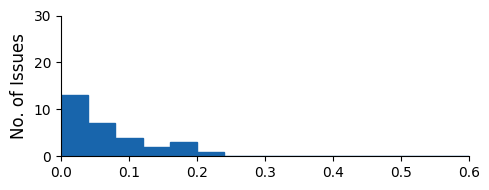

In [12]:
plot_jsd_histogram(results_by_combo, ('neutral', 'mandarin', 'c'), jsd_col)

30
Plotting histogram for ('neutral', 'english', 'c')


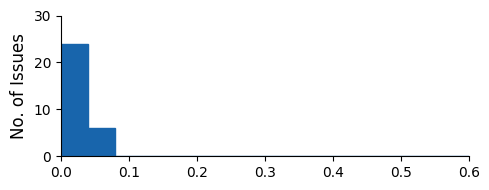

In [13]:
key = ('neutral', 'english', 'c')

plot_jsd_histogram(results_by_combo, key , jsd_col)

30
Plotting histogram for ('neutral', 'mandarin', 'e')


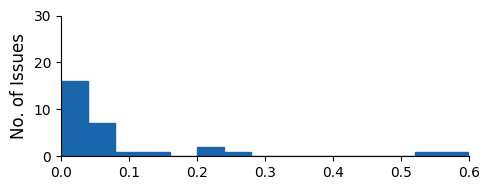

<Figure size 640x480 with 0 Axes>

In [14]:
key = ('neutral', 'mandarin', 'e')
plot_jsd_histogram(results_by_combo, key , jsd_col)

plt.tight_layout()

plt.savefig(f'figs/jsd_histogram_{key[0]}_{key[1]}_{key[2]}.png', dpi=900)

plt.show()

In [15]:
key = ('neutral', 'english', 'e')
res = results_by_combo[key].sort_values(jsd_col, ascending=False) #.head(5)

Calculating similarities | framing=neutral, language=english, media=c


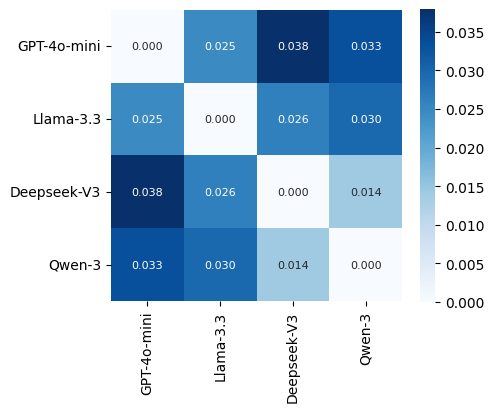

  -> Saved figs\similarity_neutral_english_c.png
Calculating similarities | framing=neutral, language=english, media=e


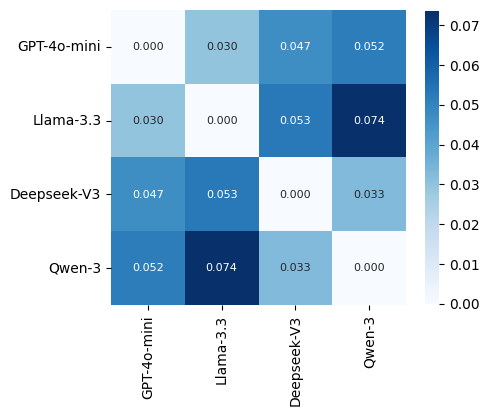

  -> Saved figs\similarity_neutral_english_e.png
Calculating similarities | framing=neutral, language=english, media=None


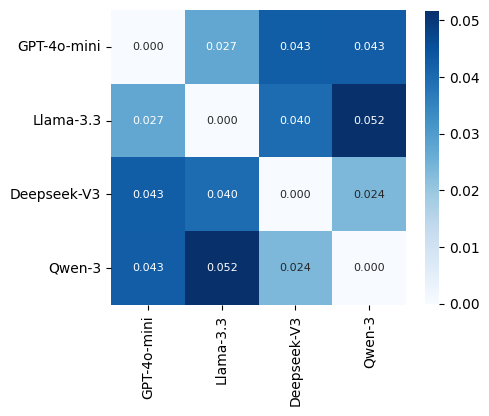

  -> Saved figs\similarity_neutral_english_all.png
Calculating similarities | framing=neutral, language=mandarin, media=c


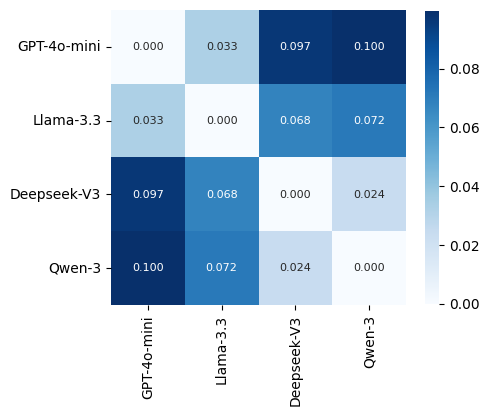

  -> Saved figs\similarity_neutral_mandarin_c.png
Calculating similarities | framing=neutral, language=mandarin, media=e


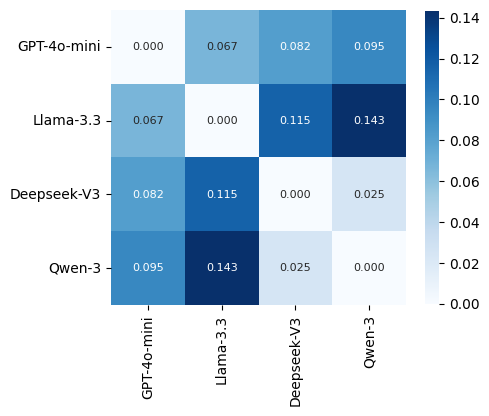

  -> Saved figs\similarity_neutral_mandarin_e.png
Calculating similarities | framing=neutral, language=mandarin, media=None


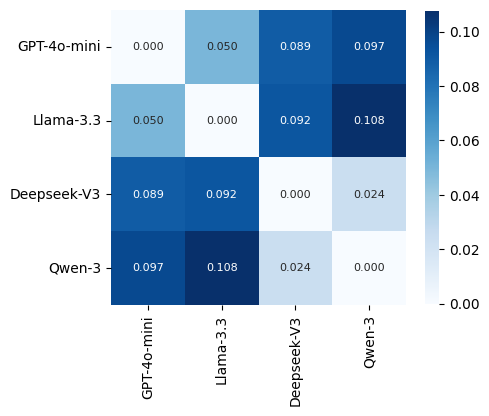

  -> Saved figs\similarity_neutral_mandarin_all.png
Calculating similarities | framing=neutral, language=all, media=c


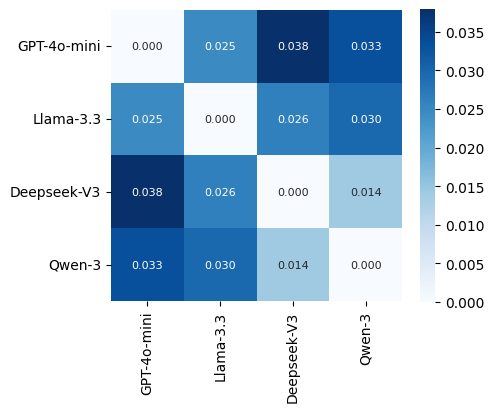

  -> Saved figs\similarity_neutral_all_c.png
Calculating similarities | framing=neutral, language=all, media=e


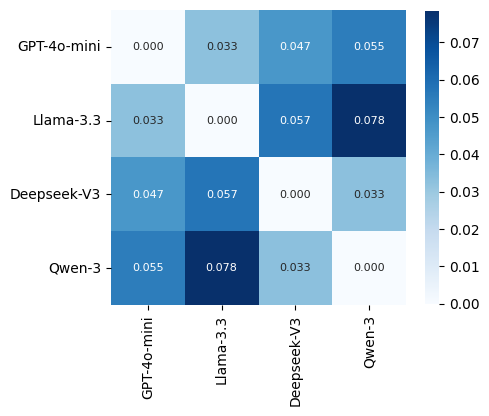

  -> Saved figs\similarity_neutral_all_e.png
Calculating similarities | framing=neutral, language=all, media=None


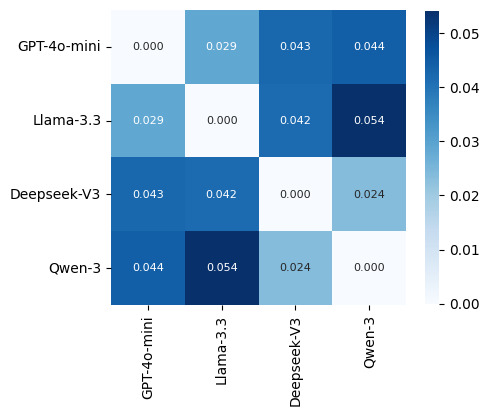

  -> Saved figs\similarity_neutral_all_all.png
Calculating similarities | framing=pro, language=english, media=c


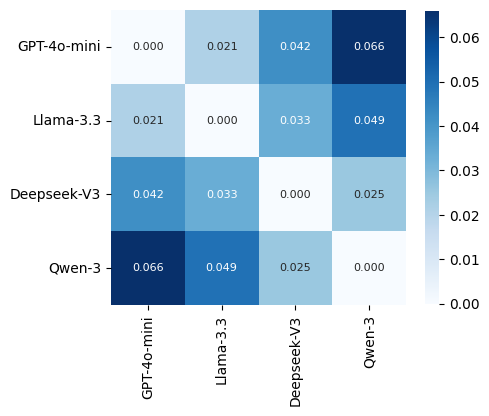

  -> Saved figs\similarity_pro_english_c.png
Calculating similarities | framing=pro, language=english, media=e


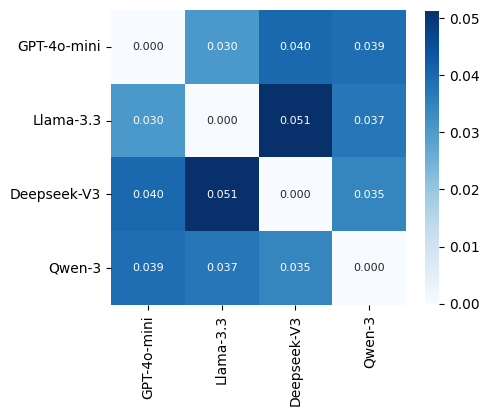

  -> Saved figs\similarity_pro_english_e.png
Calculating similarities | framing=pro, language=english, media=None


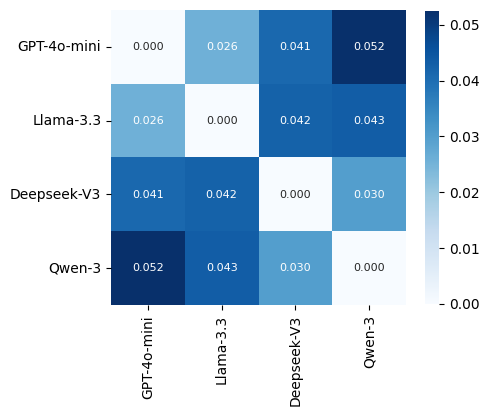

  -> Saved figs\similarity_pro_english_all.png
Calculating similarities | framing=pro, language=mandarin, media=c


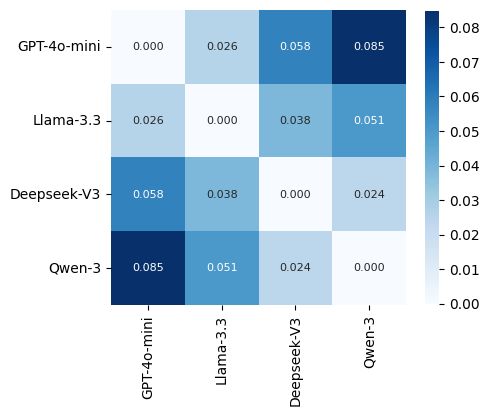

  -> Saved figs\similarity_pro_mandarin_c.png
Calculating similarities | framing=pro, language=mandarin, media=e


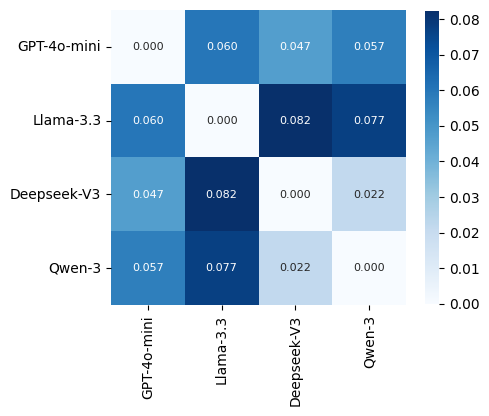

  -> Saved figs\similarity_pro_mandarin_e.png
Calculating similarities | framing=pro, language=mandarin, media=None


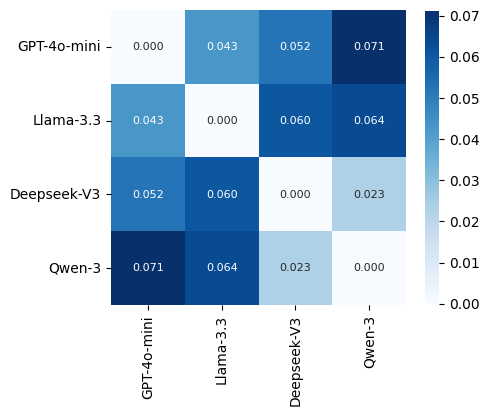

  -> Saved figs\similarity_pro_mandarin_all.png
Calculating similarities | framing=pro, language=all, media=c


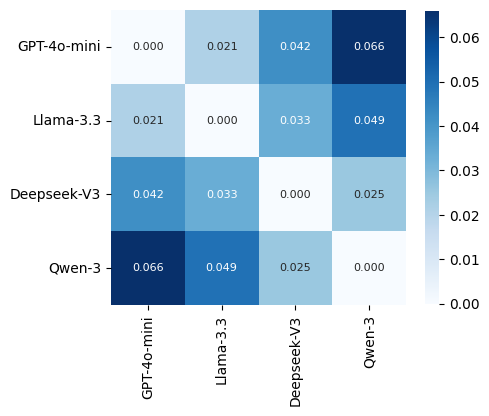

  -> Saved figs\similarity_pro_all_c.png
Calculating similarities | framing=pro, language=all, media=e


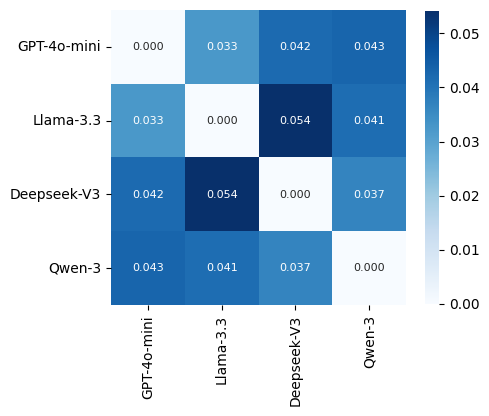

  -> Saved figs\similarity_pro_all_e.png
Calculating similarities | framing=pro, language=all, media=None


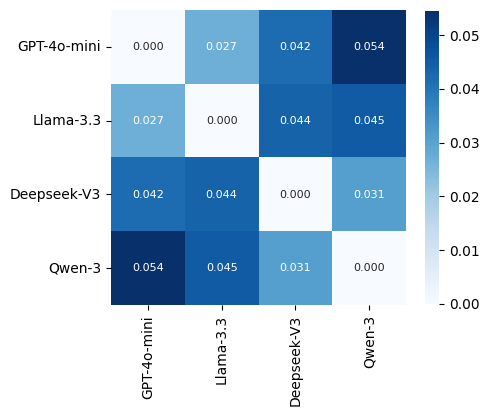

  -> Saved figs\similarity_pro_all_all.png
Calculating similarities | framing=con, language=english, media=c


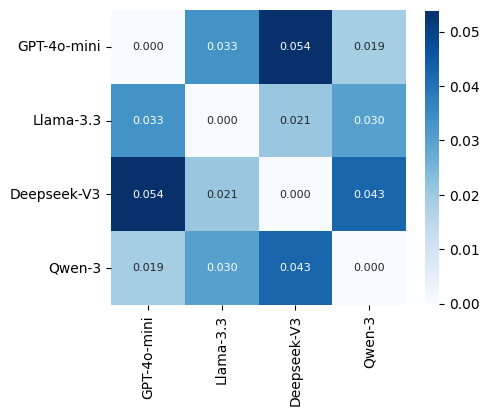

  -> Saved figs\similarity_con_english_c.png
Calculating similarities | framing=con, language=english, media=e


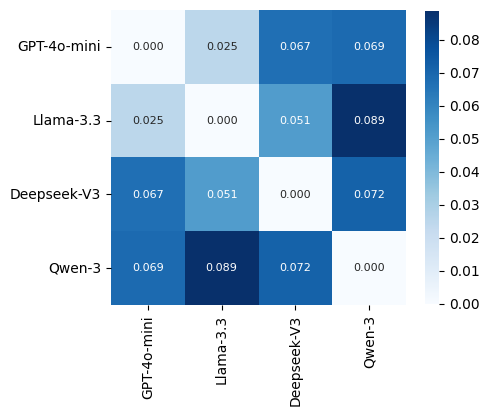

  -> Saved figs\similarity_con_english_e.png
Calculating similarities | framing=con, language=english, media=None


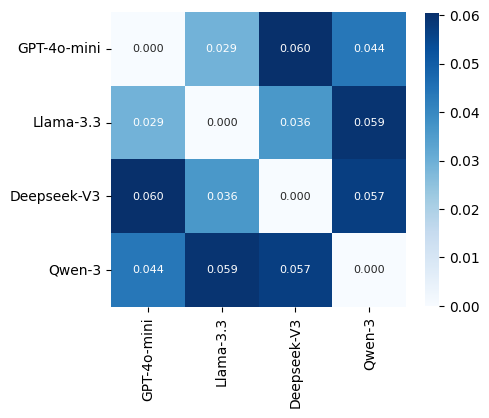

  -> Saved figs\similarity_con_english_all.png
Calculating similarities | framing=con, language=mandarin, media=c


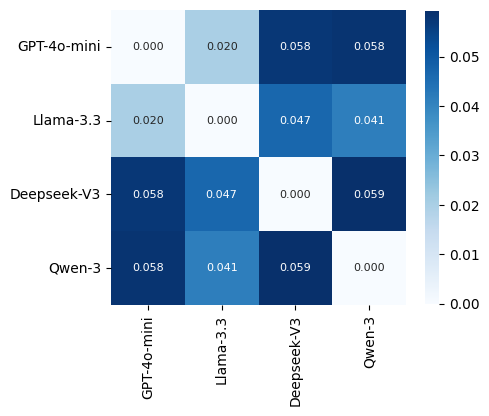

  -> Saved figs\similarity_con_mandarin_c.png
Calculating similarities | framing=con, language=mandarin, media=e


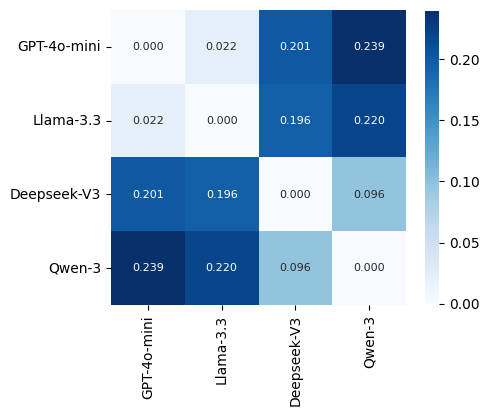

  -> Saved figs\similarity_con_mandarin_e.png
Calculating similarities | framing=con, language=mandarin, media=None


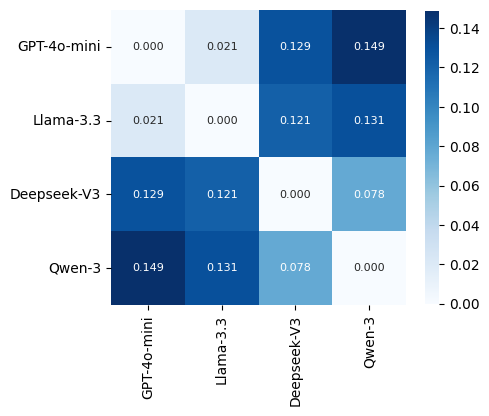

  -> Saved figs\similarity_con_mandarin_all.png
Calculating similarities | framing=con, language=all, media=c


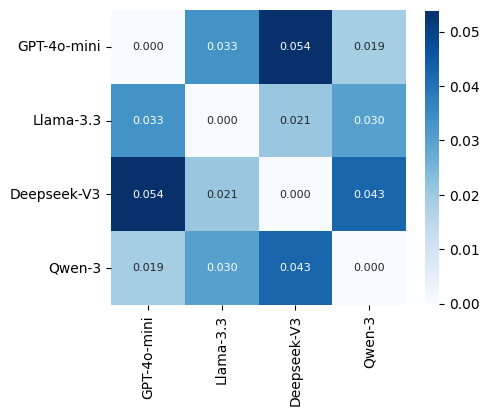

  -> Saved figs\similarity_con_all_c.png
Calculating similarities | framing=con, language=all, media=e


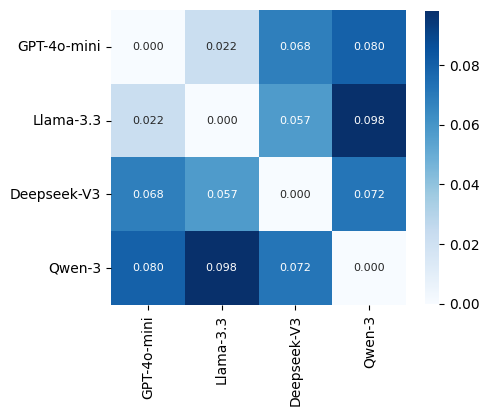

  -> Saved figs\similarity_con_all_e.png
Calculating similarities | framing=con, language=all, media=None


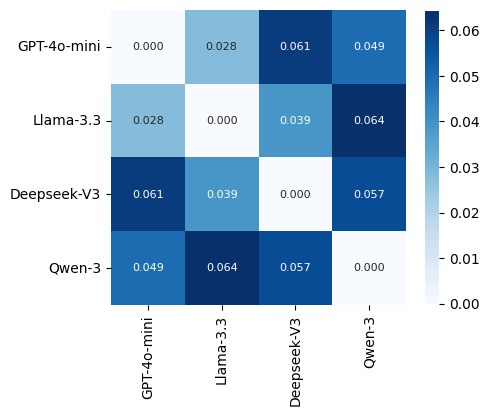

  -> Saved figs\similarity_con_all_all.png


In [16]:
MODEL_ORDER = ['GPT-4o-mini', 'Llama-3.3', 'Deepseek-V3', 'Qwen-3']
FRAMINGS   = ["neutral", "pro", "con"]
LANGS      = ["english", "mandarin", "all"]
MEDIA      = ["c", "e", None]  # None = all media

FIG_DIR = Path("./figs")
FIG_DIR.mkdir(parents=True, exist_ok=True)


# --- Main driver ---
def run_similarity_grid(topic_table_wide_dict):
    results_by_combo = {}
    matrices_by_combo = {}

    for framing, lang, media in product(FRAMINGS, LANGS, MEDIA):
        print(f"Calculating similarities | framing={framing}, language={lang}, media={media}")

        # Calculate (assumes your function exists)
        results_df, matrix_df = calculate_aggregate_model_similarities(
            topic_table_wide_dict, framing, lang, media
        )

        # Store raw outputs
        key = (framing, lang, media)
        results_by_combo[key]  = results_df
        matrices_by_combo[key] = matrix_df

        # Rename & reorder
        mat_prepped = rename_and_reorder(matrix_df, MODEL_NAME_MAPPING, MODEL_ORDER)

        # Skip plotting if nothing matches desired order
        if mat_prepped.empty:
            print("  -> Skipped plot (no overlapping models after rename/reindex).")
            continue

        # Save figure
        fname = f"similarity_{framing}_{lang}_{media_token_for_filename(media)}.png"
        outpath = FIG_DIR / fname
        plot_similarity_matrix(mat_prepped, outpath)
        print(f"  -> Saved {outpath}")

    return results_by_combo, matrices_by_combo


results_by_combo, matrices_by_combo = run_similarity_grid(topic_table_wide_dict)


In [17]:
# from itertools import product
# import numpy as np
# import pandas as pd
# from scipy.stats import entropy

# map_culture = {
#     'Western': ['Llama-3.3-70b-instruct', 'Gpt-4o-mini'],
#     'Chinese': ['Deepseek-chat-v3-0324', 'Qwen3-235b-a22b']
# }

# response_cols = ['1', '2', '3', '4', '5', 'refusal']



# def aggregate_culture_distribution(df_list, topic_combined, subset_languages=None, subset_media=None):
#     """Aggregate probability distributions across a list of model DataFrames."""
#     collected = []
#     for df in df_list:
#         subset = df[df['topic_combined'] == topic_combined]
#         if subset_languages and subset_languages != 'all':
#             subset = subset[subset['language'] == subset_languages]
#         if subset_media:
#             subset = subset[subset['cluster_id'].str.contains(subset_media)]
#         if not subset.empty:
#             collected.append(subset[response_cols].iloc[0].values.astype(float))
#     if not collected:
#         return None
#     collected = np.array(collected)
#     agg = collected.mean(axis=0)  # mean distribution across models
#     if agg.sum() > 0:
#         agg = agg / agg.sum()
#     return agg

# def analyze_culture_similarities(topic_table_long_dict,
#                                  subset_topics=None,
#                                  subset_languages=None,
#                                  subset_media=None):
#     """Compute JSD between aggregated Western and Chinese model responses for each topic."""
#     western_models = map_culture['Western']
#     chinese_models = map_culture['Chinese']

#     western_dfs = [topic_table_long_dict[m] for m in western_models if m in topic_table_long_dict]
#     chinese_dfs = [topic_table_long_dict[m] for m in chinese_models if m in topic_table_long_dict]

#     # get reference topics from any one model
#     ref_df = list(topic_table_long_dict.values())[0]
#     if subset_topics:
#         ref_df = ref_df[ref_df['topic_combined'].str.contains(subset_topics)]
#     if subset_languages:
#         ref_df = ref_df[ref_df['language'] == subset_languages]
#     if subset_media:
#         ref_df = ref_df[ref_df['cluster_id'].str.contains(subset_media)]

#     results = []
#     for _, row in ref_df.iterrows():
#         topic = row['topic_combined']
#         topic_text = row['topic_text']

#         dist_western = aggregate_culture_distribution(western_dfs, topic, subset_languages, subset_media)
#         dist_chinese = aggregate_culture_distribution(chinese_dfs, topic, subset_languages, subset_media)

#         if dist_western is None or dist_chinese is None:
#             continue

#         jsd = calculate_jsd(dist_western, dist_chinese)

#         results.append({
#             'topic_combined': topic,
#             'topic_text': topic_text,
#             'jsd_western_chinese': jsd
#         })

#     results_df = pd.DataFrame(results)
#     results_df = results_df.sort_values('jsd_western_chinese', ascending=False)
#     return results_df

# # results_df = analyze_culture_similarities(topic_table_long_dict, subset_languages='Chinese', subset_media='some_media')
# results_df = analyze_culture_similarities(topic_table_wide_dict, subset_topics='neutral', subset_languages='mandarin', subset_media='c')

# # Get the top 10 largest stance differences
# top_diff = results_df.head(5)

# # Export to LaTeX
# latex_header = r"""
# \small
# \renewcommand{\arraystretch}{1.4}
# \begin{longtable}{r|p{0.6\textwidth}|c}
# \textbf{\#} & \textbf{Topic (Chinese Sources on U.S.)} & \textbf{JSD (Western vs Chinese)} \\
# \hline\hline
# \endfirsthead

# \hline
# \textbf{\#} & \textbf{Topic (Chinese Sources on U.S.)} & \textbf{JSD (Western vs Chinese)} \\
# \hline\hline
# \endhead

# \hline \multicolumn{3}{r}{{Continued on next page}} \\
# \endfoot

# \caption{Largest stance differences (JSD) between Western and Chinese models on Chinese-sourced U.S. topics} \\
# \endlastfoot
# """

# latex_rows = ""
# for i, row in top_diff.iterrows():
#     latex_rows += f"{i+1} & {row['topic_text']} & {row['jsd_western_chinese']:.4f} \\\\\n\\hline\n"

# latex_footer = r"\end{longtable}"

# with open("largest_culture_diff_c_mandarin.tex", "w", encoding="utf-8") as f:
#     f.write(latex_header + latex_rows + latex_footer)


In [18]:
# results_df.sort_values('jsd_western_chinese', ascending=False).head(3)

In [19]:
# # Define model name mapping
# model_name_mapping = {
#     'Gpt-4o-mini': 'GPT-4o-mini',
#     'Deepseek-chat-v3-0324': 'Deepseek-V3',
#     'Qwen3-235b-a22b': 'Qwen-3',
#     'Llama-3.3-70b-instruct': 'Llama-3.3'
# }

# # Define desired order
# model_order = ['GPT-4o-mini', 'Llama-3.3', 'Deepseek-V3', 'Qwen-3']

# # Initialize result stores
# results_by_combo = {}
# matrices_by_combo = {}
# for subset_framing in ["neutral", "pro", "con"]:
#     for subset_languages in ["english", "mandarin", "all"]:
#         for subset_media in ["c", "e", None]:
#             print(f"Calculating similarities for framings: {subset_framing}, languages: {subset_languages}, media: {subset_media}")
#             key = (subset_framing, subset_languages, subset_media)
#             results_df, matrix_df = calculate_aggregate_model_similarities (topic_table_wide_dict, subset_framing, subset_languages, subset_media)
#             results_by_combo[key] = results_df
#             matrices_by_combo[key] = matrix_df
            
#             # Rename the model names in the matrix
#             matrix_df_renamed = matrix_df.rename(index=model_name_mapping, columns=model_name_mapping)
            
#             # Reorder rows and columns
#             matrix_df_renamed = matrix_df_renamed.reindex(index=model_order, columns=model_order)
            
#             plt.figure(figsize=(5, 5))
#             sns.heatmap(matrix_df_renamed, 
#                         annot=True, 
#                         annot_kws={"fontsize": 8},
#                         fmt='.3f', 
#                         cmap='Blues',
#                         square=True,
#                         cbar_kws={"shrink": 0.72})
#             #plt.title('Average JSD Between Models')
#             plt.tight_layout()

#             plt.savefig(f'./figs/similarity_{subset_framing}_{subset_languages}_{subset_media}.png', dpi=900)

#             plt.show()

In [20]:
# # local utilities for this notebook

# def make_horizontal_bar_chart(model, row, show_latex=True, show_plot=True):
#     from matplotlib import pyplot as plt
#     fig, ax = plt.subplots(1, 1, figsize=(10, 0.75))

#     ax.barh(row.topic_text, row["1"], color="#38761dff", label="only pro")
#     ax.set_xlim(0, 100)
#     ax.set_xticks([0, 25, 50, 75, 100])
#     ax.set_xticklabels(["0%", "25%", "50%", "75%", "100%"])
#     ax.barh(row.topic_text, row["2"], left=row["1"], color="#93c47dff", label="mostly pro")
#     ax.barh(row.topic_text, row["3"], left=row["1"]+row["2"], color="#ffd966ff", label="ambivalent")
#     ax.barh(row.topic_text, row["4"], left=row["1"]+row["2"]+row["3"], color="#e06666ff", label="mostly con")
#     ax.barh(row.topic_text, row["5"], left=row["1"]+row["2"]+row["3"]+row["4"], color="#cc0000ff", label="only con")
#     ax.barh(row.topic_text, row["refusal"], left=row["1"]+row["2"]+row["3"]+row["4"]+row["5"], color="#b7b7b7ff", label="refusal")
#     ax.set_yticklabels([])
    
#     # set title 
#     ax.set_title(row.topic_text, fontweight="bold")

#     if show_plot:
#         plt.show()

#     if show_latex:
#         topic = row.topic_text
#         # Escape special characters for LaTeX
#         topic_escaped = topic.replace('_', r'\_').replace('%', r'\%').replace('&', r'\&')

#         # Print the topic as a separate bold row across columns
#         print(r"\multicolumn{2}{l}{\textbf{" + topic_escaped + r"}} \\")
#         print(r"\midrule")  # optional line after topic header

#         # Then print the model row
#         print(f"{model} & \\barrule{{{row['1']/100:.4f}}}{{{row['2']/100:.4f}}}{{{row['3']/100:.4f}}}{{{row['4']/100:.4f}}}{{{row['5']/100:.4f}}}{{{row['refusal']/100:.4f}}} \\\\")





# # def analyze_model_similarities(topic_table_wide_dict, subset_models=None, subset_topics=None, 
# #                                subset_languages=None, subset_media=None, by_origin=False):
# #     """
# #     Analyze similarities between models for each topic+language+media combination.
# #     Can group by model origin (Western vs Chinese) if by_origin=True.
    
# #     Parameters:
# #     topic_table_wide_dict: Dictionary of DataFrames, keyed by model name
# #     subset_models: List of model names to include in analysis
# #     subset_topics: String to filter topics by
# #     by_origin: If True, group models by origin (Western vs Chinese) instead of individual models
    
# #     Returns:
# #     DataFrame with similarity scores for each topic+position
# #     """
    
# #     # Define model origin groups
# #     western_models = ['Llama-3.3-70b-instruct',  'Gpt-4o-mini']
# #     chinese_models = ['Deepseek-chat-v3-0324', 'Qwen3-235b-a22b']
    
# #     if subset_models is not None:
# #         topic_table_wide_dict = {model: topic_table_wide_dict[model] for model in subset_models}

# #     response_cols = ['1', '2', '3', '4', '5', 'refusal']
# #     model_names = list(topic_table_wide_dict.keys())
# #     results = []

# #     # Get reference DataFrame for topic+position combinations
# #     ref_df = topic_table_wide_dict[model_names[0]]

# #     # optional: filter by subset of topics
# #     if subset_topics:
# #         ref_df = ref_df[ref_df['topic_combined'].str.contains(subset_topics)]

# #     if subset_languages:
# #         ref_df = ref_df[ref_df['language'] == subset_languages]
# #     if subset_media:
# #         ref_df = ref_df[ref_df['cluster_id'].str.contains(subset_media)]

# #     def get_distribution(model_df, topic_combined, subset_languages, subset_media):
# #         subset = model_df[model_df['topic_combined'] == topic_combined]
# #         if subset_languages and subset_languages != 'all':
# #             subset = subset[subset['language'] == subset_languages]
# #         if subset_media:
# #             subset = subset[subset['cluster_id'].str.contains(subset_media)]
# #         if subset.empty:
# #             return None
# #         return subset[response_cols].iloc[0].values
    
# #     def get_averaged_distribution(model_list, topic_combined, subset_languages, subset_media):
# #         """Get average distribution across models in a group"""
# #         distributions = []
# #         for model in model_list:
# #             if model in topic_table_wide_dict:
# #                 dist = get_distribution(topic_table_wide_dict[model], topic_combined, 
# #                                       subset_languages, subset_media)
# #                 if dist is not None:
# #                     distributions.append(dist)
        
# #         if not distributions:
# #             return None
# #         # Average across models in the group
# #         return np.mean(distributions, axis=0)
        
# #     # For each topic+position combination
# #     for idx, row in ref_df.iterrows():
# #         topic_combined = row['topic_combined']
# #         topic_text = row['topic_text']
# #         topic_language = row['language']
# #         topic_media = row['media_source']
# #         topic_framing = row['framing']

# #         if by_origin:
# #             # Get averaged distributions for each origin group
# #             western_dist = get_averaged_distribution(western_models, topic_combined, 
# #                                                     subset_languages, subset_media)
# #             chinese_dist = get_averaged_distribution(chinese_models, topic_combined, 
# #                                                     subset_languages, subset_media)
# #             # print(f'there is _western_dist: {western_dist}, chinese_dist: {chinese_dist}')
            
# #             # Skip if either group has no data
# #             if western_dist is None or chinese_dist is None:
# #                 print(f'no data in the group.')
# #                 continue
            
# #             # Calculate JSD between the two groups
# #             jsd = calculate_jsd(western_dist, chinese_dist)
            
# #             results.append({
# #                 'language': topic_language,
# #                 'media': topic_media,
# #                 'framing': topic_framing,
# #                 'topic_combined': topic_combined,
# #                 'topic_text': topic_text,
# #                 'jsd': jsd,
# #                 'comparison': 'Western vs Chinese'
# #             })
# #         else:
# #             # Original behavior: compare individual models
# #             distributions = []
# #             for model in model_names:
# #                 dist = get_distribution(topic_table_wide_dict[model], topic_combined, 
# #                                       subset_languages, subset_media)
# #                 if dist is not None:
# #                     distributions.append(dist)
            
# #             # If fewer than 2 models available, skip
# #             if len(distributions) < 2:
# #                 continue

# #             # Calculate JSD between each pair of models
# #             jsds = []
# #             for model1, model2 in combinations(range(len(distributions)), 2):
# #                 jsd = calculate_jsd(distributions[model1], distributions[model2])
# #                 jsds.append(jsd)

# #             # Store results
# #             results.append({
# #                 'language': topic_language,
# #                 'media': topic_media,
# #                 'framing': topic_framing,
# #                 'topic_combined': topic_combined,
# #                 'topic_text': topic_text,
# #                 'avg_jsd': np.mean(jsds),
# #                 'max_jsd': np.max(jsds),
# #                 'min_jsd': np.min(jsds),
# #                 'std_jsd': np.std(jsds)
# #             })
    
# #     # Convert results to DataFrame and sort
# #     results_df = pd.DataFrame(results)
# #     if by_origin:
# #         results_df = results_df.sort_values('jsd')
# #     else:
# #         results_df = results_df.sort_values('avg_jsd')
    
# #     return results_df





# # def calculate_model_similarities_across_all_topics(topic_table_long_dict, subset_topics=None, subset_languages=None, subset_media=None):
# #     """
# #     Calculate pairwise similarities between models across all topics.
    
# #     Parameters:
# #     topic_table_long_dict: Dictionary of DataFrames, keyed by model name
    
# #     Returns:
# #     DataFrame: Pairwise JSD scores between models
# #     """

# #     response_cols = ['1', '2', '3', '4', '5', 'refusal']

# #     def get_distribution(model_df, topic_combined, subset_languages, subset_media):
# #         subset = model_df[model_df['topic_combined'] == topic_combined]
# #         if subset_languages and subset_languages != 'all':
# #             subset = subset[subset['language'] == subset_languages]
# #         if subset_media:
# #             subset = subset[subset['cluster_id'].str.contains(subset_media)]
# #         if subset.empty:
# #             return None
# #         return subset[response_cols].iloc[0].values


# #     model_names = list(topic_table_long_dict.keys())
    
# #     # Initialize dictionary to store pairwise JSDs
# #     model_pairs_jsd = {(m1, m2): [] for m1, m2 in combinations(model_names, 2)}
    
# #     # Get reference DataFrame for topic+position combinations
# #     ref_df = topic_table_wide_dict[model_names[0]]

# #     # optional: filter by subset of topics
# #     if subset_topics:
# #         ref_df = ref_df[ref_df['topic_combined'].str.contains(subset_topics)]
# #     if subset_languages:
# #         # print(ref_df.columns)
# #         ref_df = ref_df[ref_df['language'] == subset_languages]   
# #     if subset_media:
# #         ref_df[ref_df['cluster_id'].str.contains(subset_media)]  
# #     # print(f'what is the length of ref_df? {len(ref_df)}')
# #     # For each topic+position
# #     for idx, row in ref_df.iterrows():
# #         topic_combined = row['topic_combined']
        
# #         for model1, model2 in combinations(model_names, 2):
# #             dist1 = get_distribution(topic_table_long_dict[model1], topic_combined, subset_languages, subset_media)
# #             dist2 = get_distribution(topic_table_long_dict[model2], topic_combined, subset_languages, subset_media)

# #             if dist1 is None or dist2 is None:
# #                 continue

# #             jsd = calculate_jsd(dist1, dist2)
# #             model_pairs_jsd[(model1, model2)].append(jsd)

        
# #     # Calculate summary statistics for each model pair
# #     results = []
# #     for (model1, model2), jsds in model_pairs_jsd.items():
# #         results.append({
# #             'model1': model1,
# #             'model2': model2,
# #             'avg_jsd': np.mean(jsds),
# #             'median_jsd': np.median(jsds),
# #             'std_jsd': np.std(jsds),
# #             'min_jsd': np.min(jsds),
# #             'max_jsd': np.max(jsds)
# #         })
    
# #     # Convert to DataFrame
# #     results_df = pd.DataFrame(results)
# #     results_df = results_df.sort_values('avg_jsd')
    
# #     # Create symmetric matrix of average JSDs
# #     matrix_df = pd.DataFrame(0.0, 
# #                            index=model_names, 
# #                            columns=model_names)
    
# #     for _, row in results_df.iterrows():
# #         matrix_df.loc[row['model1'], row['model2']] = row['avg_jsd']
# #         matrix_df.loc[row['model2'], row['model1']] = row['avg_jsd']
    
# #     return results_df, matrix_df



# def generate_highest_divergence_tables(neutral_framed, top_n=5):

#     expected_cols = ['1','2','3','4','5','refusal']

#     def escape_latex(text):
#         replacements = {
#             '_': r'\_',
#             '/': r'\/',
#             '%': r'\%',
#             '&': r'\&',
#             '#': r'\#',
#             '{': r'\{',
#             '}': r'\}',
#             '$': r'\$',
#             '~': r'\textasciitilde{}',
#             '^': r'\textasciicircum{}',
#             '\\': r'\textbackslash{}',
#         }
#         for char, repl in replacements.items():
#             text = text.replace(char, repl)
#         return text
    
#     def format_latex_row(issue_en, issue_zh, row, is_gray):
#         en_vals = row[[f"{c}_en" for c in expected_cols]].to_numpy(dtype=float)
#         zh_vals = row[[f"{c}_zh" for c in expected_cols]].to_numpy(dtype=float)

#         # normalize
#         en_vals = en_vals / en_vals.sum() if en_vals.sum() > 0 else en_vals
#         zh_vals = zh_vals / zh_vals.sum() if zh_vals.sum() > 0 else zh_vals

#         # build bars
#         bar_en = r"\barrule{" + "}{".join([f"{v:.4f}" for v in en_vals]) + "}"
#         bar_zh = r"\barrule{" + "}{".join([f"{v:.4f}" for v in zh_vals]) + "}"

#         rowcolor = r"\rowcolor[HTML]{EFEFEF} " if is_gray else ""
#         return f"{rowcolor}{escape_latex(issue_en)} & {bar_en} & {escape_latex(issue_zh)} & {bar_zh} \\\\"

#     for model in neutral_framed['model'].unique():
#         df_model = neutral_framed[neutral_framed['model'] == model]

#         # split english vs mandarin
#         df_en = df_model[df_model['language'] == 'english']
#         df_zh = df_model[df_model['language'] == 'mandarin']

#         # stance distributions grouped by cluster_id
#         stance_en = df_en.groupby('cluster_id')['stance'].value_counts(normalize=True).unstack(fill_value=0)
#         stance_zh = df_zh.groupby('cluster_id')['stance'].value_counts(normalize=True).unstack(fill_value=0)
#         for c in expected_cols:
#             if c not in stance_en.columns:
#                 stance_en[c] = 0
#             if c not in stance_zh.columns:
#                 stance_zh[c] = 0
#         stance_en = stance_en[expected_cols].reset_index()
#         stance_zh = stance_zh[expected_cols].reset_index()

#         # issue text
#         issue_en_df = df_en[['cluster_id','issue']].drop_duplicates('cluster_id').rename(columns={'issue':'issue_en'})
#         issue_zh_df = df_zh[['cluster_id','issue']].drop_duplicates('cluster_id').rename(columns={'issue':'issue_zh'})

#         # merge together
#         merged = stance_en.merge(issue_en_df, on='cluster_id', how='left')
#         merged = merged.merge(stance_zh, on='cluster_id', how='left', suffixes=('_en','_zh'))
#         merged = merged.merge(issue_zh_df, on='cluster_id', how='left')

#         # compute divergence
#         divergences = []
#         for _, row in merged.iterrows():
#             en_vals = row[[f"{c}_en" for c in expected_cols]].to_numpy(dtype=float)
#             zh_vals = row[[f"{c}_zh" for c in expected_cols]].to_numpy(dtype=float)
#             jsd_val = calculate_jsd(en_vals, zh_vals)
#             divergences.append(jsd_val)
#         merged['divergence'] = divergences
#         merged = merged.sort_values('divergence', ascending=False).head(top_n)

#         latex_rows = []
#         for i, (_, row) in enumerate(merged.iterrows()):
#             # print(row)
#             latex_rows.append(format_latex_row(row['issue_en'], row['issue_zh'], row, is_gray=(i % 2 == 0)))

#         latex_body = "\n".join(latex_rows)
#         model_display = escape_latex(model)
#         caption = f"\\textbf{{Top {top_n} issues with largest stance divergence between English and Mandarin for {model_display}.}}"

#         latex_table = f"""
#         % ========== MODEL: {model_display} ==========
#         \\begin{{table}}[H]
#         \\small
#         \\centering
#         \\renewcommand{{\\arraystretch}}{{1.2}}
#         \\resizebox{{\\linewidth}}{{!}}{{%
#         \\begin{{tabular}}{{p{{6cm}}l p{{6cm}}l}}
#         \\toprule
#         \\textbf{{Issue (English)}} & \\textbf{{English Stance}} & \\textbf{{Issue (Mandarin)}} & \\textbf{{Mandarin Stance}} \\\\
#         \\midrule
#         {latex_body}
#         \\bottomrule
#         \\end{{tabular}}
#         }}
#         \\caption{{{caption}}}
#         \\label{{tab:stance-divergence-{model.replace('/','-').replace('_','-')}}}
#         \\end{{table}}
#         """
#         print(latex_table)





# def plot_jsd_histogram(results_by_combo, key, jsd_col):
#     res = results_by_combo[key].sort_values(jsd_col, ascending=False) #.head(5)
#     print(len(res))
#     print(f"Plotting histogram for {key}")
#     # Create the figure
#     plt.figure(figsize=(5, 2))

#     # Create the histogram with seaborn
#     sns.histplot(
#         data=res,
#         x=jsd_col,
#         bins=15,
#         binrange=(0, 0.6),
#         edgecolor='#1865ac',
#         color='#1865ac',  # A pleasant blue color
#         alpha=1
#     )

#     # Customize the axes
#     plt.ylim(0, 30)          # lock y-axis to 0..30
#     plt.xlim(0, 0.6)
#     plt.xlabel('')
#     plt.ylabel('No. of Issues', fontsize=12)

#     # Remove spines
#     sns.despine()

#     # Adjust layout
#     plt.tight_layout()

#     plt.savefig(f'figs/jsd_histogram_{key[0]}_{key[1]}_{key[2]}.png', dpi=900)

#     plt.show()




In [21]:
# import numpy as np
# import pandas as pd
# from itertools import combinations


# # Constants
# RESPONSE_COLS = ['1', '2', '3', '4', '5', 'refusal']
# WESTERN_MODELS = ['Llama-3.3-70b-instruct', 'Gpt-4o-mini']
# CHINESE_MODELS = ['Deepseek-chat-v3-0324', 'Qwen3-235b-a22b']


# def _filter_dataframe(df, topic_filter=None, language_filter=None, media_filter=None):
#     """Apply filters to a dataframe."""
#     filtered_df = df.copy()
    
#     if topic_filter:
#         filtered_df = filtered_df[filtered_df['topic_combined'].str.contains(topic_filter)]
#     if language_filter:
#         filtered_df = filtered_df[filtered_df['language'] == language_filter]
#     if media_filter:
#         filtered_df = filtered_df[filtered_df['cluster_id'].str.contains(media_filter)]
    
#     return filtered_df


# def _get_topic_distribution(model_df, topic_id, language_filter=None, media_filter=None):
#     """
#     Extract response distribution for a specific topic from a model's dataframe.
    
#     Returns:
#         np.array or None: Distribution vector, or None if no data found
#     """
#     subset = model_df[model_df['topic_combined'] == topic_id]
    
#     if language_filter and language_filter != 'all':
#         subset = subset[subset['language'] == language_filter]
#     if media_filter:
#         subset = subset[subset['cluster_id'].str.contains(media_filter)]
    
#     if subset.empty:
#         return None
    
#     return subset[RESPONSE_COLS].iloc[0].values


# def _get_averaged_distribution(model_list, topic_table_dict, topic_id, 
#                                language_filter=None, media_filter=None):
#     """
#     Calculate average distribution across multiple models for a given topic.
    
#     Returns:
#         np.array or None: Averaged distribution, or None if no data available
#     """
#     distributions = []
    
#     for model_name in model_list:
#         if model_name in topic_table_dict:
#             dist = _get_topic_distribution(
#                 topic_table_dict[model_name], 
#                 topic_id, 
#                 language_filter, 
#                 media_filter
#             )
#             if dist is not None:
#                 distributions.append(dist)
    
#     if not distributions:
#         return None
    
#     return np.mean(distributions, axis=0)


# def analyze_per_topic_similarities(topic_table_dict, 
#                                    filter_models=None,
#                                    filter_topics=None, 
#                                    filter_language=None, 
#                                    filter_media=None,
#                                    group_by_origin=False):
#     """
#     Analyze model similarities for each individual topic.
    
#     Calculates Jensen-Shannon Divergence (JSD) between models for each topic.
#     Can compare individual models or group by origin (Western vs Chinese).
    
#     Parameters:
#         topic_table_dict (dict): Model name -> DataFrame mapping
#         filter_models (list, optional): Specific models to include
#         filter_topics (str, optional): String pattern to filter topics
#         filter_language (str, optional): Language to filter by
#         filter_media (str, optional): Media type to filter by
#         group_by_origin (bool): If True, compare Western vs Chinese models
        
#     Returns:
#         pd.DataFrame: Per-topic similarity scores with columns:
#             - language, media, framing, topic_combined, topic_text
#             - If group_by_origin=False: avg_jsd, max_jsd, min_jsd, std_jsd
#             - If group_by_origin=True: jsd, comparison
#     """
#     # Filter models if specified
#     if filter_models is not None:
#         topic_table_dict = {m: topic_table_dict[m] for m in filter_models}
    
#     model_names = list(topic_table_dict.keys())
    
#     # Get reference DataFrame and apply filters
#     ref_df = topic_table_dict[model_names[0]]
#     ref_df = _filter_dataframe(ref_df, filter_topics, filter_language, filter_media)
    
#     results = []
    
#     # Process each topic
#     for _, row in ref_df.iterrows():
#         topic_id = row['topic_combined']
        
#         if group_by_origin:
#             # Compare Western vs Chinese model groups
#             western_dist = _get_averaged_distribution(
#                 WESTERN_MODELS, topic_table_dict, topic_id, 
#                 filter_language, filter_media
#             )
#             chinese_dist = _get_averaged_distribution(
#                 CHINESE_MODELS, topic_table_dict, topic_id,
#                 filter_language, filter_media
#             )
            
#             if western_dist is None or chinese_dist is None:
#                 continue
            
#             jsd = calculate_jsd(western_dist, chinese_dist)
            
#             results.append({
#                 'language': row['language'],
#                 'media': row['media_source'],
#                 'framing': row['framing'],
#                 'topic_combined': topic_id,
#                 'topic_text': row['topic_text'],
#                 'jsd': jsd,
#                 'comparison': 'Western vs Chinese'
#             })
#         else:
#             # Compare individual models pairwise
#             distributions = []
#             for model_name in model_names:
#                 dist = _get_topic_distribution(
#                     topic_table_dict[model_name], topic_id,
#                     filter_language, filter_media
#                 )
#                 if dist is not None:
#                     distributions.append(dist)
            
#             if len(distributions) < 2:
#                 continue
            
#             # Calculate JSD for all pairs
#             jsds = [
#                 calculate_jsd(distributions[i], distributions[j])
#                 for i, j in combinations(range(len(distributions)), 2)
#             ]
            
#             results.append({
#                 'language': row['language'],
#                 'media': row['media_source'],
#                 'framing': row['framing'],
#                 'topic_combined': topic_id,
#                 'topic_text': row['topic_text'],
#                 'avg_jsd': np.mean(jsds),
#                 'max_jsd': np.max(jsds),
#                 'min_jsd': np.min(jsds),
#                 'std_jsd': np.std(jsds)
#             })
    
#     # Convert to DataFrame and sort
#     results_df = pd.DataFrame(results)
#     sort_col = 'jsd' if group_by_origin else 'avg_jsd'
#     results_df = results_df.sort_values(sort_col)
    
#     return results_df


# def calculate_aggregate_model_similarities(topic_table_dict,
#                                           filter_topics=None,
#                                           filter_language=None, 
#                                           filter_media=None):
#     """
#     Calculate pairwise similarities between models aggregated across all topics.
    
#     Computes average JSD between each pair of models across all topics.
    
#     Parameters:
#         topic_table_dict (dict): Model name -> DataFrame mapping
#         filter_topics (str, optional): String pattern to filter topics
#         filter_language (str, optional): Language to filter by
#         filter_media (str, optional): Media type to filter by
        
#     Returns:
#         tuple: (pairwise_df, similarity_matrix)
#             - pairwise_df: DataFrame with columns [model1, model2, avg_jsd, 
#               median_jsd, std_jsd, min_jsd, max_jsd]
#             - similarity_matrix: Symmetric DataFrame of average JSDs
#     """
#     model_names = list(topic_table_dict.keys())
    
#     # Initialize storage for pairwise JSDs
#     pairwise_jsds = {pair: [] for pair in combinations(model_names, 2)}
    
#     # Get reference DataFrame and apply filters
#     ref_df = topic_table_dict[model_names[0]]
#     ref_df = _filter_dataframe(ref_df, filter_topics, filter_language, filter_media)
    
#     # Calculate JSD for each model pair across all topics
#     for _, row in ref_df.iterrows():
#         topic_id = row['topic_combined']
        
#         for model1, model2 in combinations(model_names, 2):
#             dist1 = _get_topic_distribution(
#                 topic_table_dict[model1], topic_id, 
#                 filter_language, filter_media
#             )
#             dist2 = _get_topic_distribution(
#                 topic_table_dict[model2], topic_id,
#                 filter_language, filter_media
#             )
            
#             if dist1 is None or dist2 is None:
#                 continue
            
#             jsd = calculate_jsd(dist1, dist2)
#             pairwise_jsds[(model1, model2)].append(jsd)
    
#     # Calculate summary statistics
#     results = []
#     for (model1, model2), jsds in pairwise_jsds.items():
#         if not jsds:  # Skip if no valid comparisons
#             continue
            
#         results.append({
#             'model1': model1,
#             'model2': model2,
#             'avg_jsd': np.mean(jsds),
#             'median_jsd': np.median(jsds),
#             'std_jsd': np.std(jsds),
#             'min_jsd': np.min(jsds),
#             'max_jsd': np.max(jsds),
#             'n_topics': len(jsds)
#         })
    
#     pairwise_df = pd.DataFrame(results).sort_values('avg_jsd')
    
#     # Create symmetric similarity matrix
#     similarity_matrix = pd.DataFrame(
#         0.0, 
#         index=model_names, 
#         columns=model_names
#     )
    
#     for _, row in pairwise_df.iterrows():
#         similarity_matrix.loc[row['model1'], row['model2']] = row['avg_jsd']
#         similarity_matrix.loc[row['model2'], row['model1']] = row['avg_jsd']
    
#     return pairwise_df, similarity_matrix